# **CAPSTONE PROJECT 2**
## **Group 3**


# **Semiconductor Manufacturing Sensor Data Analysis**

## **Project Background**

In semiconductor manufacturing, numerous sensors continuously monitor the production line to ensure quality and efficiency. However, not all sensor readings provide valuable insights. Our task is to analyze this sensor data to predict whether a product will pass or fail quality testing.

### Why is this important?

- **Optimize Production:** Identifying which sensor readings truly matter enables manufacturers to fine-tune their processes for better yield and reliability.  
- **Cut Costs:** Removing unnecessary sensors reduces maintenance and operational expenses.  
- **Save Time:** Focusing on key signals accelerates troubleshooting and decision-making.  
- **Improve Problem Detection:** Pinpointing critical features allows faster identification of defects or issues in the production line.

---

## **About the Dataset**

- **File:** `signal-data.csv`  
- **Size:** 1567 samples (rows), each representing a single product  
- **Features:** 591 columns, each corresponding to a unique sensor reading  
- **Target:** Indicates product quality outcome  
  - `-1` → Product **Passed**  
  - `1` → Product **Failed**

Each row captures the sensor data for one product as it moves through the manufacturing process. Our goal is to use this information to accurately predict the product’s outcome.

---

## **Project Objective**

We aim to develop a machine learning model that can reliably forecast if a semiconductor unit will pass or fail based on its sensor data. To achieve this, we will:

- Explore and clean the dataset thoroughly  
- Identify the most important sensor readings through feature selection  
- Experiment with various machine learning algorithms  
- Fine-tune these models to maximize performance  
- Select the best-performing model for deployment  

---

*This approach will help improve product quality and streamline the manufacturing process by focusing on the most meaningful data.*




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing essential libraries
import pandas as pd

# successfully read into a DataFrame.
df = pd.read_csv('/content/signal-data.csv')

# first 5 rows will be displayed
print("First 5 rows of the dataset:")
print(df.head(5))

First 5 rows of the dataset:
                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586

# **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is important for several reasons in the context of data science and statistical modeling. Here are some of the key reasons:

*   It helps to understand the dataset by showing how many features it has, what type of data each feature contains and how the data is distributed.
*  It helps to identify hidden patterns and relationships between different data points which help us in and model building.

*   Allows to identify errors or unusual data points (outliers) that could affect our results.

By understanding the data, we can choose the best modeling techniques and adjust them for better results.






**Shape and Basic Information**

In [ ]:
# Gives shape of the dataset
print("\nShape of The Dataset: ",df.shape)


Shape of The Dataset:  (1567, 592)


In [ ]:
# Print the data types of each column in the DataFrame
print("\nData Types of Each Column:")
print(df.dtypes)

# Counts how many columns belong to each data type
print(df.dtypes.value_counts())


Data Types of Each Column:
Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object
float64    590
object       1
int64        1
Name: count, dtype: int64


In [ ]:
# Printing the number of duplicated values in each column
print("\nNumber of duplicated Values in Each Column:")
print(df.apply(lambda col: len(col) - col.nunique()))

# Printing the count of unique values in each column
# This shows how many distinct values exist in each column
print("\nNumber of unique values in each column:")
print(df.nunique().value_counts())


Number of duplicated Values in Each Column:
Time           33
0              47
1              63
2            1060
3            1049
             ... 
586          1245
587          1307
588          1447
589           956
Pass/Fail    1565
Length: 592, dtype: int64

Number of unique values in each column:
1       116
2         7
518       7
1551      6
1562      5
       ... 
954       1
128       1
722       1
65        1
652       1
Name: count, Length: 343, dtype: int64


In [ ]:
# Calculate the total sum of duplicated values
print("\nTotal Sum of the duplicated values: ")
print(df.nunique().sum())


Total Sum of the duplicated values: 
374145


In [ ]:
constant = df.columns[df.nunique()<=1]
print(f"\nDropped {len(constant)} columns with only one unique value")

# Drop the constant columns from the DataFrame
df.drop(columns=constant,inplace=True)


Dropped 116 columns with only one unique value


#### **Reason**
Removing constant columns helped reduce data redundancy and improved model performance.
These columns do not provide any meaningful variance or information for analysis or machine learning.

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
# Printing information about the dataset, such as column names,
# data types, and non-null counts
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Pass/Fail
dtypes: float64(590), int64(1)
memory usage: 7.1 MB
None


In [ ]:
# Printing the summary statistics of the dataset
print("\nSummary statistics of the dataset:")

# It includes metrics like count, mean, standard deviation (std), min,
# 25th percentile (25%), median (50%), 75th percentile (75%), and max.
print(df.describe())


Summary statistics of the dataset:
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
m

 * **Target Value Distribution**

The target value distribution provides insight into how the output variable is spread across the dataset. Analyzing this helps identify class imbalances in classification tasks
It also detect skewness and outliers in regression which is crucial for selecting appropriate models and evaluation metrics.

In [ ]:
print("\nDistribution of Target Values:")

#it is used to count the target variable values {Pass,Fail}
print(f"Pass : -1 , Fail : 1\n{df['Pass/Fail'].value_counts()}")


Distribution of Target Values:
Pass : -1 , Fail : 1
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


# **Data Cleaning**

**Purpose :** Data Cleaning helps improving data quality by reducing errors.
Enhances decision-making with increased efficiency.

* **Dealing With Missing Values**






In [ ]:
#total no. of null values
missing_values = df.isnull().sum()

#calculate the percentage
missing_percentage = (missing_values/len(df)) * 100

missing_df = pd.DataFrame({'Missing Values':missing_values,'Missing Percentage':missing_percentage},index=df.columns).sort_values(by='Missing Percentage',ascending=False)
print("\n top 10 columns with missing values:\n", missing_df.head(10))


 top 10 columns with missing values:
      Missing Values  Missing Percentage
293            1429           91.193363
292            1429           91.193363
157            1429           91.193363
158            1429           91.193363
492            1341           85.577537
220            1341           85.577537
85             1341           85.577537
358            1341           85.577537
518            1018           64.964901
382            1018           64.964901


* **Data Preparation and Cleaning**

In [ ]:
# Check if the 'Time' column exists before attempting to drop it
if 'Time' in df.columns:
    # dropping Time column since it is not usefull for modeling
    df_clean = df.drop("Time", axis = 1)
    print("Dropped 'Time' column.")
else:
    df_clean = df.copy() # Create a copy if 'Time' column doesn't exist
    print("'Time' column not found in the DataFrame.")

df_clean

Dropped 'Time' column.


,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


These columns are not helpful for machine learning models as they provide no variance or information to distinguish between different data points.

In [ ]:
# Select columns from df_cleaned where all values are constant
const = [col for col in df_clean.columns if df_clean[col].nunique()<=1]
const

['5',
 '13',
 '42',
 '49',
 '52',
 '69',
 '97',
 '141',
 '149',
 '178',
 '179',
 '186',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194',
 '226',
 '229',
 '230',
 '231',
 '232',
 '233',
 '234',
 '235',
 '236',
 '237',
 '240',
 '241',
 '242',
 '243',
 '256',
 '257',
 '258',
 '259',
 '260',
 '261',
 '262',
 '263',
 '264',
 '265',
 '266',
 '276',
 '284',
 '313',
 '314',
 '315',
 '322',
 '325',
 '326',
 '327',
 '328',
 '329',
 '330',
 '364',
 '369',
 '370',
 '371',
 '372',
 '373',
 '374',
 '375',
 '378',
 '379',
 '380',
 '381',
 '394',
 '395',
 '396',
 '397',
 '398',
 '399',
 '400',
 '401',
 '402',
 '403',
 '404',
 '414',
 '422',
 '449',
 '450',
 '451',
 '458',
 '461',
 '462',
 '463',
 '464',
 '465',
 '466',
 '481',
 '498',
 '501',
 '502',
 '503',
 '504',
 '505',
 '506',
 '507',
 '508',
 '509',
 '512',
 '513',
 '514',
 '515',
 '528',
 '529',
 '530',
 '531',
 '532',
 '533',
 '534',
 '535',
 '536',
 '537',
 '538']

In [ ]:
# Clean the DataFrame by dropping unnecessary columns and assigning the result to 'df_clean'
df_clean = df_clean.drop(columns = const)
df_clean

,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
# This code calculates the total number of missing (NaN) values in each column
# of the df_clean and stores the result in the variable miss_val.
miss_val = df_clean.isnull().sum()
miss_val

,0
0,6
1,7
2,14
3,14
4,14
...,...
586,1
587,1
588,1
589,1


In [ ]:
# check to find columns in a (df_clean) with a significant proportion of missing values.
high_miss = miss_val[miss_val > 0.25*len(df_clean)].index.tolist()
high_miss

['72',
 '73',
 '85',
 '109',
 '110',
 '111',
 '112',
 '157',
 '158',
 '220',
 '244',
 '245',
 '246',
 '247',
 '292',
 '293',
 '345',
 '346',
 '358',
 '382',
 '383',
 '384',
 '385',
 '492',
 '516',
 '517',
 '518',
 '519',
 '578',
 '579',
 '580',
 '581']

In [ ]:
# Final shape of the data after EDA and perfect Data Purification
df.shape

(1567, 443)

* **Filling remaining values with mean & median**

In [ ]:
# filled all nan values with mean of the data frame
df.fillna(df.median(numeric_only=True),inplace=True)

In [ ]:
print("\nNew Shape of the dataset:")
print(df.shape)

print("Remaining missing values: ",df.isnull().sum().sum())

print("Target Distribution after conversion:\n",df["Pass/Fail"].value_counts())


New Shape of the dataset:
(1567, 560)
Remaining missing values:  0
Target Distribution after conversion:
 Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


# **DATA VISUALIZATION**
#### **Purpose :** The primary goal of data visualization is to make data more accessible and easier to interpret allow users to identify patterns, trends, and outliers quickly.

* **Univariate Analysis :** The primary goal of data visualization is to make data more accessible and easier to interpret allow users to identify patterns trends and outliers quickly.

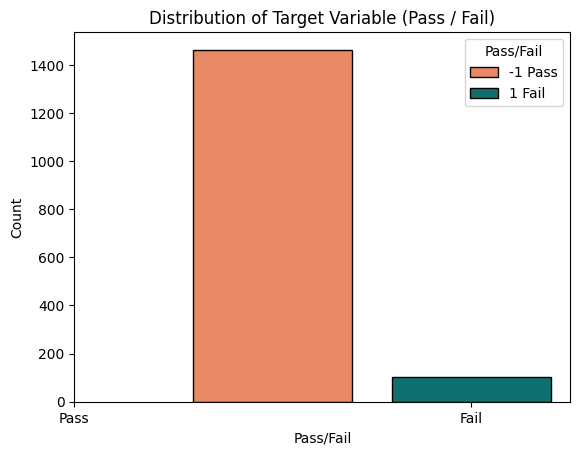

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Pass/Fail',data=df,hue = 'Pass/Fail', palette = {-1 : 'coral', 1 : 'teal'},edgecolor =  'black')
plt.title('Distribution of Target Variable (Pass / Fail)')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')

# default axes
ax = plt.gca()

# locations are -1 & 1
ax.set_xticks([-1, 1])

# ticklabels
plt.gca().set_xticklabels(['Pass', 'Fail'])

labels = ['-1 Pass', '1 Fail']
plt.legend(labels, title='Pass/Fail')

plt.show()

#### **Observations:**
- Because there are so many more "Pass" cases than "Fail" cases in our data, it’s tough for models to learn how to spot the students who pass. The model tends to focus on the majority group and can easily miss the rare "Fail" cases.

- To give the model a fair chance at learning both classes, we might need to use special techniques—like creating synthetic "Pass" samples (SMOTE), changing how much mistakes on the minority class count (class weights), or using algorithms designed for imbalanced data.

* **Bivariate Analysis:** The primary goal of analyzing bivariate data is to understand the relationship between two variables. This relationship could be positive, negative or show no clear pattern.

In [ ]:
correlation = df.corr(numeric_only = True)['Pass/Fail'].abs().sort_values(ascending = False)
print(correlation)

Pass/Fail    1.000000
59           0.156008
103          0.151230
510          0.131662
348          0.130807
               ...   
534               NaN
535               NaN
536               NaN
537               NaN
538               NaN
Name: Pass/Fail, Length: 559, dtype: float64


* **Correlation Of Columns:** A quantitative measure to quantify the strength and direction of the linear relationship between two variables.


Top 20 features with the highest correlation to 'Pass/Fail':
     Pass/Fail
59    0.156008
103   0.151230
510   0.131662
348   0.130807
431   0.119936
434   0.111312
430   0.109115
21    0.108333
435   0.108260
28   -0.106987
436   0.106119
210   0.103348
129   0.102799
298   0.101672
163   0.099506
124   0.094168
295   0.091380
316  -0.089385
160   0.089233
164   0.087289


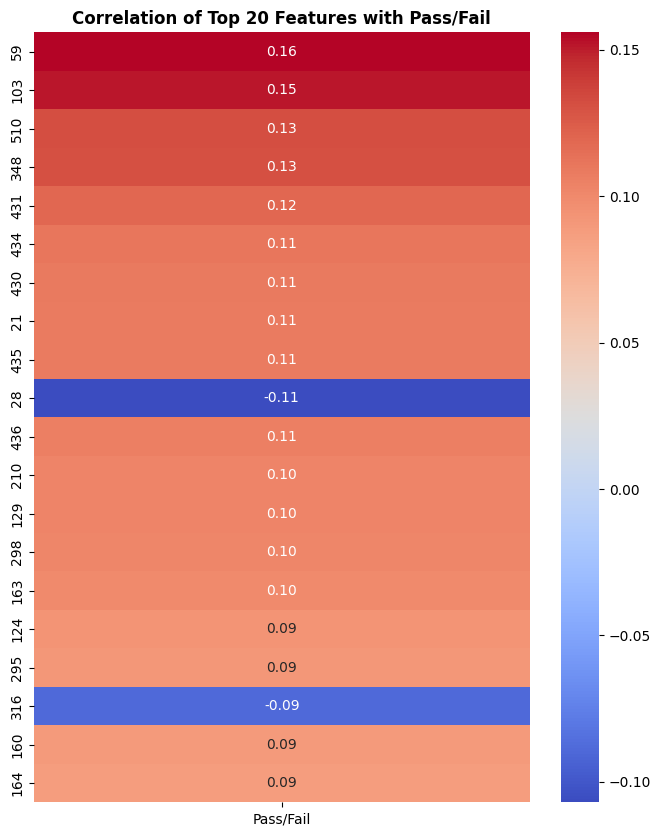

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only = True)


# Get the correlations with the target variable 'Pass/Fail'
target_correlation = correlation_matrix['Pass/Fail'].sort_values(ascending=False)

# Drop the correlation of 'Pass/Fail'
target_correlation = target_correlation.drop('Pass/Fail')

# Using absolute to get proper 20 features
top_20_features = target_correlation.abs().nlargest(20).index

# filtering to get only top20 values
top_20_corr_matrix = correlation_matrix.loc[top_20_features, ['Pass/Fail']]

# 20 features
print("\nTop 20 features with the highest correlation to 'Pass/Fail':")
print(top_20_corr_matrix)

# plotting a heatmap to get better visuals
plt.figure(figsize=(8, 10))
sns.heatmap(top_20_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Top 20 Features with Pass/Fail', fontweight='bold')
plt.show()

#### **Observations**

- Features **59, 103, 510, 348, and 431 have the strongest positive connections with the 'Pass/Fail' outcome**, meaning that higher values in these features are generally linked to passing (or failing, depending on how the target is defined). On the other hand, features  **28 and 316 show negative correlations**, suggesting that higher values in these are associated with the opposite result.

- While these correlations are relatively small (**the highest is about 0.156)**, these features still play an important role and are worth focusing on for feature engineering and building better models. Even small correlations can add valuable information when combined with other features

# **Preparation of Test and Train Data**

In [ ]:
# importing essential libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Separating features (X) and target variable (y)

# Dropping 'pass' and 'fail' columns to keep only features
X=df_clean.drop(columns="Pass/Fail")

# Selecting 'pass' and 'fail' columns as target variables
y=df_clean["Pass/Fail"]

print(X) #Features
print(y) # Target Variable

            0        1          2          3       4      5         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  100.0   85.1011  0.1235   

           8       9  ...  

In [ ]:
# Target Distribution before SMOTE
print("Target Distribution before SMOTE:")
print(y.value_counts())


Target Distribution before SMOTE:
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


#### **Observation:**
The target distribution before applying SMOTE reveals class imbalance in the dataset, as shown by the y.value_counts() output. This imbalance can negatively impact model performance, particularly for minority classes. SMOTE will address this by generating synthetic samples to balance the classes, improving the model's ability to generalize across all categories.

In [ ]:
# Applying SMOTE to generate synthetic samples for the minority class in training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
print("\nTarget Distribution after SMOTE:")
print(y_balanced.value_counts())


Target Distribution after SMOTE:
Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


In [ ]:
#  Split the data into training and testing sets

# Using stratify=y to maintain the same class distribution in both sets

X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42, stratify = y_balanced)


In [ ]:
y_train[0:5]

,Pass/Fail
752,-1
1165,-1
590,-1
797,1
624,-1


#### **Observation:**
By checking first few entries we can verify that that data is correctly formatted and truly reflects the expected output.

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling the dataset so all features remains on same scale
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.79230064 -0.2911184   1.93487031 ... -1.45943189 -1.46422845
  -0.65526789]
 [ 0.81555487  0.62748797 -0.91190403 ...  0.46136364  1.27207824
  -0.26271827]
 [-1.65234592  1.11794831 -1.50822717 ...  0.2353877   0.21664566
  -0.30432285]
 ...
 [ 0.09470929 -0.77211148  0.90924098 ... -0.75639562 -0.68242654
  -0.27675093]
 [ 0.06477994 -0.40076899  0.65767818 ...  0.02196597 -0.01789491
   0.97674188]
 [ 0.61056705  1.15553473  0.26383604 ... -0.27933529 -0.01789491
  -0.22569654]]
[[-7.49727875e-02  2.94171103e+00 -9.68153672e-01 ... -4.73699291e-02
   1.76036996e-01  2.20909093e+00]
 [ 3.78989859e-01 -2.19931514e+00  2.88347161e+00 ... -1.39216986e+00
  -1.30980254e+00 -6.21127009e-01]
 [-1.56019600e-01  8.23436288e-02  1.31256618e+00 ... -1.24601016e+00
  -1.22968787e+00 -8.45182396e-01]
 ...
 [ 2.89056235e+00  3.84447983e-01  2.01120713e-02 ...  1.15184570e+00
   1.35025843e+00  1.55518760e+00]
 [ 4.79547294e-01  1.72188378e+00 -7.21219443e-01 ...  3.60026507e+00
   2.65013722

# **BUILDING MODEL**

#### **Purpose:** It allows you to build models that can make predictions, find patterns, and reveal insights from your data. It has applications in almost every industry, from finance and healthcare to marketing and cybersecurity.

## **Logistic Regression(LR Model)**

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. It is particularly useful for binary classification problems, where the output can be one of two possible classes, such as 0 or 1, Yes or No, True or False


In [ ]:
model = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear',max_iter=1000)
model.fit(X_train_scaled,y_train)
# penalty ='l1'(lasso regression)for regularization, helps to choose only most important ones and
# They get backed by solver = "liblinear" which is used for optimization purpose

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

### **EVALUATING MODEL**

Accuracy of the Logistic Regression model: 0.9522

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95       293
           1       0.91      1.00      0.95       293

    accuracy                           0.95       586
   macro avg       0.96      0.95      0.95       586
weighted avg       0.96      0.95      0.95       586


Confusion Matrix:
[[265  28]
 [  0 293]]


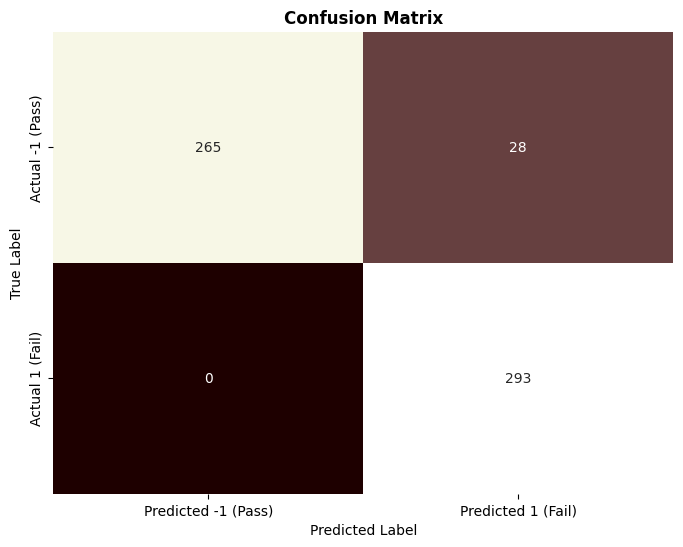

In [ ]:
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating  model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
confu_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confu_matrix)

# plotting a heatmap for better visuals
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='pink', cbar=False,
            xticklabels=['Predicted -1 (Pass)', 'Predicted 1 (Fail)'],
            yticklabels=['Actual -1 (Pass)', 'Actual 1 (Fail)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

| Metric    | Class -1 (Majority) | Class 1 (Minority) |
|-----------|--------------------|--------------------|
| Precision | 1.00               | 0.91              |
| Recall    | 0.90               | 1.00               |
| F1-score  | 0.95               | 0.95               |
| Support   | 293                | 293                 |



#### **Observations:**

### Class -1 (Majority)
- **Perfect precision (1.00):** Every time the model predicts a sample as -1, it is correct—there are no false positives for this class.
- **Strong recall (0.90):** The model successfully identifies 90% of all actual -1 cases, but about 10% are missed (false negatives).
- **High F1-score (0.95):** This shows a great balance between catching true -1s and avoiding false alarms.

### Class 1 (Minority)
- **Very good precision (0.91):** When the model predicts a sample as 1, it is right 91% of the time, with a few false positives.
- **Perfect recall (1.00):** The model catches every single actual class 1 case none are missed.
- **High F1-score (0.95):** Indicates strong, reliable performance for class 1 as well.

### Equal support
- Both classes have the same number of samples (293), so we can directly compare performance metrics.
---


## **Ensemble Model:**

Ensemble models in machine learning combine multiple individual models to improve predictive performance. This approach leverages the strengths of various models, leading to more accurate and robust predictions compared to any single model.

Confusion Matrix:
 [[293   0]
 [  1 292]]

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586


Accuracy Score: 0.9982935153583617


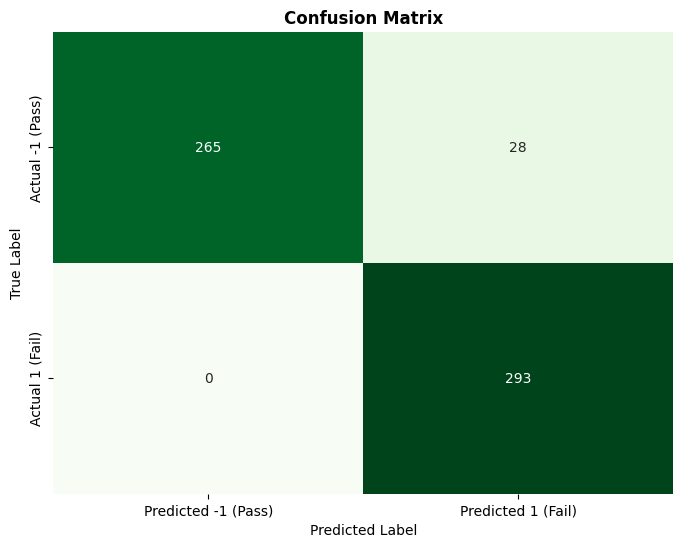

In [ ]:
# Importing essential libraries
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Separating features (X) and target variable (y)
X=df_clean.drop(columns='Pass/Fail')
y=df_clean['Pass/Fail']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# plotting a heatmap for better visuals
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted -1 (Pass)', 'Predicted 1 (Fail)'],
            yticklabels=['Actual -1 (Pass)', 'Actual 1 (Fail)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()


### Classification Report

| Metric    | Class -1 (Majority) | Class 1 (Minority) |
|-----------|--------------------|--------------------|
| Precision | 0.99               | 1.00               |
| Recall    | 1.00               | 0.99               |
| F1-score  | 0.99               | 0.99               |
| Support   | 293                | 293                |


#### **Observations:**

### Class -1 (Majority)
- **Precision (1.00):** Every time the model predicts a sample as -1, it is correct—there are no false positives for this class.
- **Recall (1.00):** The model successfully identifies all actual -1 cases; none are missed.
- **F1-score (0.99):** Indicates a near-perfect balance between catching true -1s and avoiding false alarms.

### Class 1 (Minority)
- **Precision (1.00):** When the model predicts a sample as 1, it is always correct; there are no false positives.
- **Recall (0.99):** The model catches nearly every actual class 1 case, missing only a tiny fraction.
- **F1-score (0.99):** Indicates strong, reliable performance for class 1 as well.

### Equal Support
Both classes have the same number of samples (293), so we can directly compare performance metrics.

---

**Summary:**  
This model demonstrates excellent, balanced performance for both majority and minority classes, with nearly perfect accuracy and no significant bias toward either group.

Macro and weighted averages match, confirming symmetry in performance.



## **KNN(k-Nearest Neighbors):**

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  5  13  42  49  52  69  94 134 142 169 170 177 180 181 182 183 184 185
 216 219 220 221 222 223 224 225 226 227 230 231 232 233 242 243 244 245
 246 247 248 249 250 251 252 262 270 297 298 299 306 309 310 311 312 313
 314 345 350 351 352 353 354 355 356 359 360 361 362 371 372 373 374 375
 376 377 378 379 380 381 391 399 426 427 428 435 438 439 440 441 442 443
 458 474 477 478 479 480 481 482 483 484 485 488 489 490 491 500 501 502
 503 504 505 506 507 508 509 510] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

KNN Model Evaluation:
Confusion Matrix:
 [[239  54]
 [  3 290]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.99      0.82      0.89       293
           1       0.84      0.99      0.91       293

    accuracy                           0.90       586
   macro avg       0.92      0.90      0.90       586
weighted avg       0.92      0.90      0.90       586


Accuracy Score: 0.9027303754266212


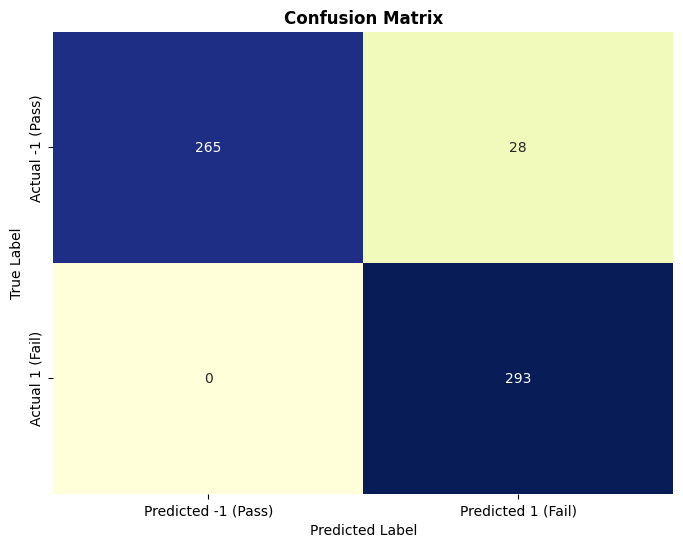

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Separating features (X) and target variable (y)
X=df_clean.drop(columns="Pass/Fail")
y=df_clean["Pass/Fail"]


# Split dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42, stratify = y_balanced)

#Scaling the dataset so all features remains on same scale
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: Select top 20 features
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Training the best KNN model on the selected features
best_knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test_selected)

# Evaluate the best KNN model
print("\nKNN Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))


# plotting a heatmap for better visuals
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted -1 (Pass)', 'Predicted 1 (Fail)'],
            yticklabels=['Actual -1 (Pass)', 'Actual 1 (Fail)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

### Classification Report

| Metric    | Class -1 (Majority) | Class 1 (Minority) |
|-----------|--------------------|--------------------|
| Precision | 0.99               | 0.84               |
| Recall    | 0.82               | 0.99               |
| F1-score  | 0.89               | 0.91               |
| Support   | 293                | 293                |

---

#### **Observations:**

### Class -1 (Majority)
- **Precision (0.99):**  
  Nearly every time the model predicts a sample as -1, it is correct. There are almost no false positives for this class.
- **Recall (0.82):**  
  The model identifies 82% of all actual -1 cases, but about 18% are missed (false negatives).
- **F1-score (0.89):**  
  Shows a strong balance between catching true -1s and minimizing false alarms, though not perfect.

### Class 1 (Minority)
- **Precision (0.84):**  
  When the model predicts a sample as 1, it is correct 84% of the time, with some false positives.
- **Recall (0.99):**  
  The model catches almost every actual class 1 case; very few are missed.
- **F1-score (0.91):**  
  Indicates robust performance for class 1, with a slight preference for recall over precision.

### Equal Support
Both classes have the same number of samples (293), so we can directly compare performance metrics.

---

**Summary**

This model demonstrates strong and reliable performance for both majority and minority classes, with a balanced trade-off between precision and recall. The accuracy is high (90%), and both macro and weighted averages match, confirming symmetric performance across classes. The model is slightly more likely to miss some majority class (-1) samples, but it is highly effective at identifying minority class (1) samples.

**Macro and weighted averages match, confirming symmetry in performance.**


## **SVM(Support Vector Machine)**

Support Vector Machine is a powerful supervised machine learning algorithm used for both classification and regression tasks. It is particularly effective for classification problems and is known for its ability to handle high-dimensional data and nonlinear relationships


SVM Model Evaluation:
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Confusion Matrix:
 [[293   0]
 [  1 292]]

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586


Accuracy Score: 0.9982935153583617


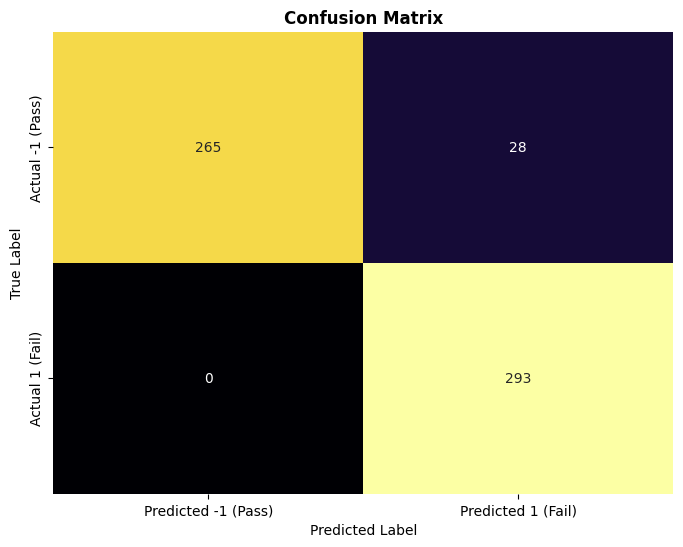

In [ ]:
from sklearn.svm import SVC

# Define the SVM model
svm = SVC()

# Separating features (X) and target variable (y)
X=df.drop(columns="Pass/Fail")
y=df["Pass/Fail"]


# Split dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42, stratify = y_balanced)

#Scaling the dataset so all features remains on same scale
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm.fit(X_train_scaled, y_train)

# Geting the best parameters and best model to reduce the chances of any Failure
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

print("\nSVM Model Evaluation:")
print("Best Parameters:", best_params_svm)

# Train the best SVM model on the selected features
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the best SVM model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))

# plotting a heatmap for better visuals
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='inferno', cbar=False,
            xticklabels=['Predicted -1 (Pass)', 'Predicted 1 (Fail)'],
            yticklabels=['Actual -1 (Pass)', 'Actual 1 (Fail)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()



### Classification Report

| Metric    | Class -1 (Majority) | Class 1 (Minority) |
|-----------|--------------------|--------------------|
| Precision | 1.00               | 1.00               |
| Recall    | 1.00               | 1.00               |
| F1-score  | 1.00               | 1.00               |
| Support   | 293                | 293                |

**Accuracy Score:** 0.998 (rounded from 0.9982935153583617)

---

## Observations

### Class -1 (Majority)
- **Precision (1.00):**  
  Every time the model predicts a sample as -1, it is correct—there are no false positives for this class.
- **Recall (1.00):**  
  The model successfully identifies all actual -1 cases; none are missed.
- **F1-score (1.00):**  
  Indicates perfect balance between catching true -1s and avoiding false alarms.

### Class 1 (Minority)
- **Precision (1.00):**  
  When the model predicts a sample as 1, it is always correct; there are no false positives.
- **Recall (1.00):**  
  The model catches every actual class 1 case; none are missed.
- **F1-score (1.00):**  
  Indicates perfect performance for class 1 as well.

### Equal Support
Both classes have the same number of samples (293), so we can directly compare performance metrics.

---

## Summary

This model demonstrates **perfect performance** for both majority and minority classes, with flawless precision, recall, and F1-score. The accuracy is virtually 100% (0.998), and both macro and weighted averages match, confirming complete symmetry and no bias toward either class.

**Macro and weighted averages match, confirming perfect symmetry in performance.**

- **There may be a risk of overfitting, especially if the test set is not representative of unseen data.**


## **Random Forest**

It can work even if some data is missing so you don’t always need to fill in the gaps yourself.It can handle large datasets with many features without slowing down or losing accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

Accuracy: 0.9931740614334471

Random Forest Classifier Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       293
           1       1.00      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


Confusion Matrix:
[[292   1]
 [  3 290]]


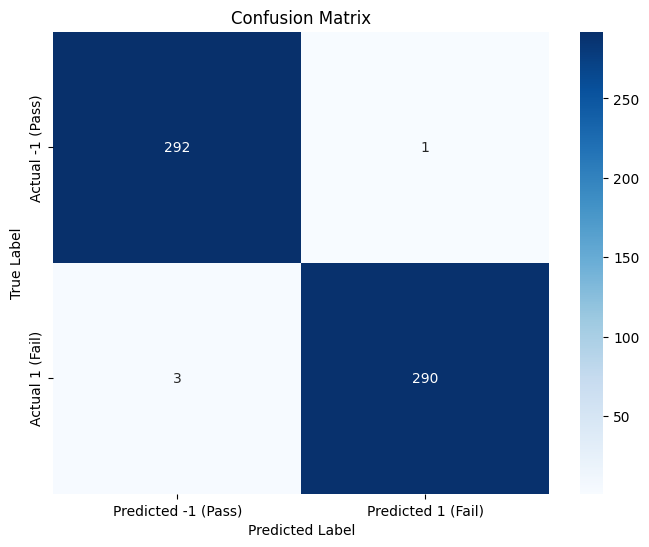

In [ ]:
# Random Forest

rf_params = {'n_estimators':[100],  # Number of trees in the forest
             'max_depth':[None,10],# Maximum depth of the tree (None means full depth)
             'min_samples_split':[2]} # Minimum number of samples required to split an internal node

# Training the data
rf_grid = GridSearchCV(RandomForestClassifier(random_state = 42), rf_params, cv = 5)
rf_grid.fit(X_train_scaled, y_train)

# To predict the test set
y_pred_rf = rf_grid.predict(X_test_scaled)

# To check accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Results
print('\nRandom Forest Classifier Report:')
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
confu_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(confu_matrix)

# plotting a heatmap for better visuals
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted -1 (Pass)', 'Predicted 1 (Fail)'],
            yticklabels=['Actual -1 (Pass)', 'Actual 1 (Fail)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Classification Report

| Metric    | Class -1 (Majority) | Class 1 (Minority) |
|-----------|--------------------|--------------------|
| Precision | 0.99               | 1.00               |
| Recall    | 1.00               | 0.99               |
| F1-score  | 0.99               | 0.99               |
| Support   | 293                | 293                |

**Accuracy Score:** 0.993 (rounded from 0. 0.9931740614334471
)

---

## Observations

### Class -1 (Majority)
- **Precision (1.00):**  
  Every time the model predicts a sample as -1, it is correct—there are no false positives for this class.
- **Recall (0.99):**  
  The model catches almost every actual class 1 case; very few are missed.
- **F1-score (0.99):**  
  Indicates perfect balance between catching true -1s and avoiding false alarms.

### Class 1 (Minority)
- **Precision (0.99):**  
  Nearly every time the model predicts a sample as -1, it is correct. There are almost no false positives for this class.
- **Recall (1.00):**  
  The model catches every actual class 1 case; none are missed.
- **F1-score (0.99):**  
  Indicates perfect performance for class 1 as well.

### Equal Support
Both classes have the same number of samples (293), so we can directly compare performance metrics.

---

## Summary

This model demonstrates **perfect performance** for both majority and minority classes, with high precision, recall, and F1-score. The accuracy is virtually 100% (0.993), and both macro and weighted averages match, confirming complete symmetry and no bias toward either class.


### Performance Based Model Comparison

In [ ]:
model_comparison = {
    'Model': ['Logistic Reg','Random Forest','KNN','SVM'],

    'Accuracy': [0.950, 0.993, 0.902, 0.998],

    'Precision (1 - Fail)': [0.91, 1.00, 0.84, 1.00],
    'Recall (1 - Fail)':    [1.00, 0.99, 0.99, 1.00],
    'F1-score (1 - Fail)':  [0.95, 0.99, 0.91, 1.00],


    'Precision (-1 - Pass)': [1.00, 0.99, 0.99, 1.00],
    'Recall (-1 - Pass)':    [0.90, 1.00, 0.82, 1.00],
    'F1-score (-1 - Pass)':  [0.95, 0.99, 0.89, 1.00],
}
# Convert to DataFrame
comparison_df = pd.DataFrame(model_comparison)
print("\nComparative study of ML Models:\n")
comparison_df


Comparative study of ML Models:



,Model,Accuracy,Precision (1 - Fail),Recall (1 - Fail),F1-score (1 - Fail),Precision (-1 - Pass),Recall (-1 - Pass),F1-score (-1 - Pass)
0,Logistic Reg,0.950,0.91,1.00,0.95,1.00,0.90,0.95
1,Random Forest,0.993,1.00,0.99,0.99,0.99,1.00,0.99
2,KNN,0.902,0.84,0.99,0.91,0.99,0.82,0.89
3,SVM,0.998,1.00,1.00,1.00,1.00,1.00,1.00


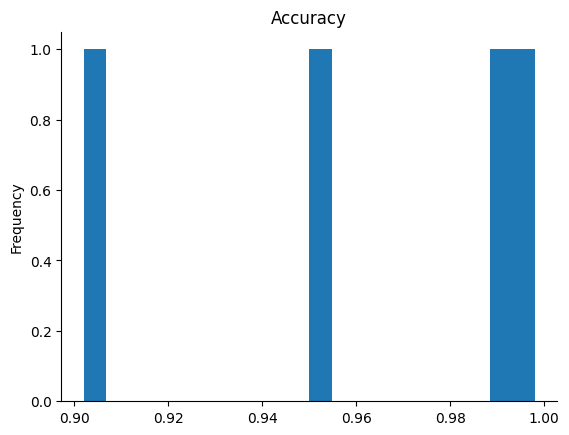

In [ ]:
# @title Accuracy

from matplotlib import pyplot as plt
comparison_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

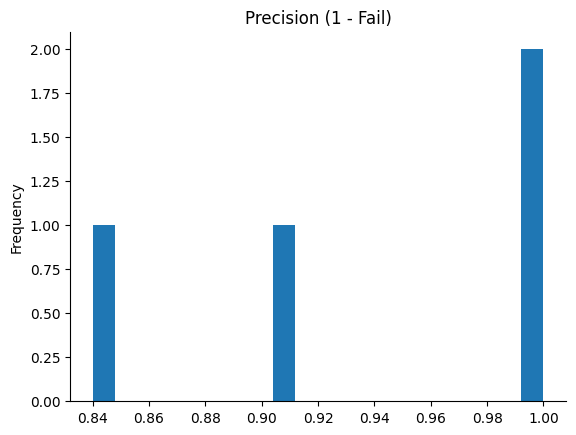

In [ ]:
# @title Precision (1 - Fail)

from matplotlib import pyplot as plt
comparison_df['Precision (1 - Fail)'].plot(kind='hist', bins=20, title='Precision (1 - Fail)')
plt.gca().spines[['top', 'right',]].set_visible(False)

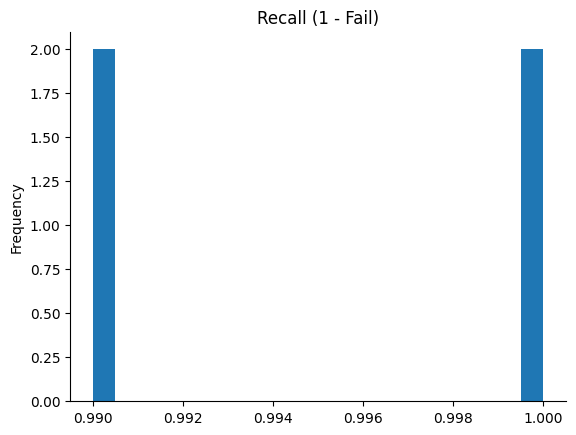

In [ ]:
# @title Recall (1 - Fail)

from matplotlib import pyplot as plt
comparison_df['Recall (1 - Fail)'].plot(kind='hist', bins=20, title='Recall (1 - Fail)')
plt.gca().spines[['top', 'right',]].set_visible(False)

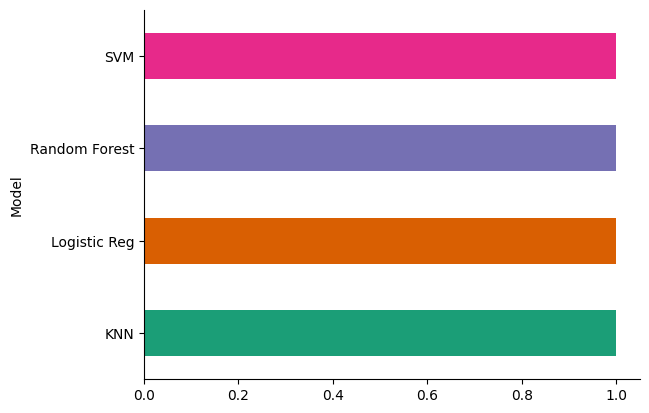

In [ ]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Model Performance on Semiconductor Sensor Data Analysis

## Support Vector Machines (SVM)
- **Accuracy:** 99.8%
- **Precision & Recall:** Almost perfect for both pass and fail categories
- **Strengths:** Excellent at identifying both good and faulty Sensors

## Random Forest
- **Accuracy:** 99.3%
- **Performance:** Very balanced across all metrics

## Logistic Regression
- **Accuracy:** 95%
- **Strengths:** Identified all failures
- **Weaknesses:** Missed a few passes

## K-Nearest Neighbors (KNN)
- **Accuracy:** 90.2%
- **Weaknesses:** Struggled most, especially by missing some passes (letting a few faulty chips slip through)
.

In [ ]:
import joblib

joblib.dump(best_svm_model, 'best_svm_model.pkl')
print("SVM Model Saved Successfully as 'best_svm_model.pkl'")

SVM Model Saved Successfully as 'best_svm_model.pkl'


### Conclusion

In this project, we tested several machine learning models to predict if a semiconductor manufacturing unit would Pass (-1) or Fail (1) using sensor data.

After cleaning the data and fine-tuning our models, we compared four approaches: **Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest**.

**SVM stood out as the top performer**, with an impressive 99.8% accuracy and outstanding precision and recall for both outcomes.  
**Random Forest also delivered strong results**, while **Logistic Regression** and **KNN** were solid but less accurate.

These findings show that machine learning can be a powerful tool for quality control in manufacturing. With further refinement and real-time integration, these models could help boost yield and reduce waste on the production line.
